In [1]:
import pvdeg
from pvdeg.geospatial import output_template
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pandas as pd
import xarray as xr
import dask.array as da
import pickle

from dask.distributed import LocalCluster, Client

In [2]:
workers = 6

cluster = LocalCluster(
    n_workers=workers,
    processes=True, 
    )

client = Client(cluster)

print(client.dashboard_link)

http://127.0.0.1:8787/status


In [8]:
locationGetter = pvdeg.scenario.GeospatialScenario()

locationGetter.addLocation(country="United States", downsample_factor=80)

/home/tford/.conda-envs/rpp/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "phony_dim_1" starting at index 500. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


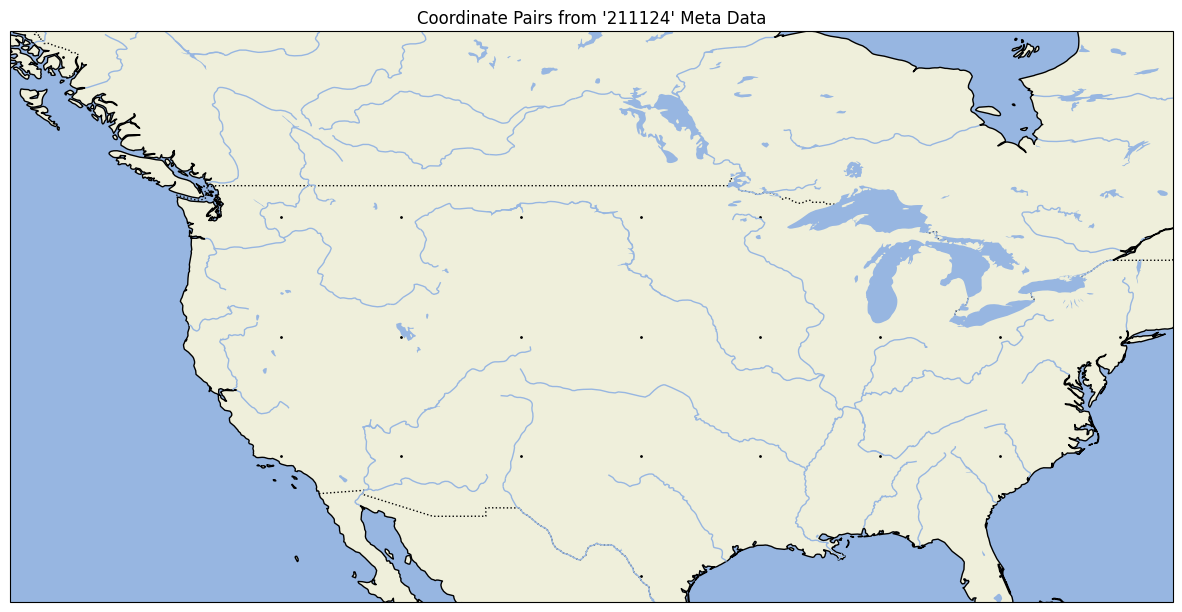

In [9]:
locationGetter.plot_coords()

In [10]:
geo_weather, geo_meta = locationGetter.geospatial_data()

geo_meta = geo_meta[geo_meta['state'] != "Alaska"]
geo_weather = geo_weather.sel(gid=geo_meta.index)

In [12]:
geo_meta.shape

(23, 8)

In [12]:
shapes = {
    "annual_poa" : ("gid",),
    "ground_irradiance" : ("gid", "time", "distance")
}

template = pvdeg.geospatial.output_template(
    ds_gids = geo_weather,
    shapes = shapes,
    add_dims={"distance" : 10}, # this will autogenerate a range of length 10 for the coordinate axis
)

In [13]:
pysam_tiny_res = pvdeg.geospatial.analysis(
    weather_ds = geo_weather,
    meta_df = geo_meta,
    func = pvdeg.pysam.inspire_ground_irradiance, 
    template = template,
)

In [14]:
pysam_tiny_res.to_netcdf('medium-pysam-ground-irradiance.nc', engine='h5netcdf')

/home/tford/.conda-envs/rpp/lib/python3.10/site-packages/distributed/client.py:3245: UserWarning: Sending large graph of size 30.89 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
